In [1]:
import pydicom
import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt

from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

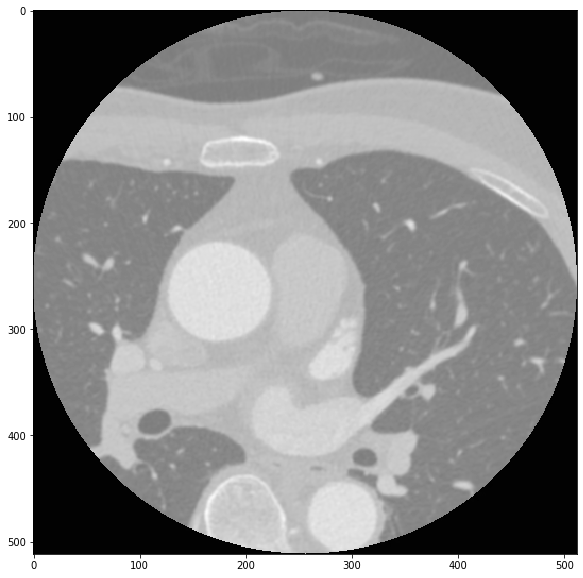

In [2]:
ds = pydicom.dcmread("../Dataset/00030826_Label_S/contrast/IM114.dcm")  
plt.figure(figsize=(10,10,))
# plt.grid(False)
plt.imshow(ds.pixel_array,cmap='gray')
plt.show()
# ds

In [24]:
def load_scan(path):
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key=lambda x:float(x.ImagePositionPatient[2]))
    slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    # slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
    print(slice_thickness)
    for index,s in enumerate(slices):
        slices[index].SliceThickness = slice_thickness
    return slices
slices = load_scan("../Dataset/00030826_Label_S/contrast")

NameError: name 'slice_thickness' is not defined

In [23]:
print(slices[0].ImagePositionPatient)
print(slices[1].ImagePositionPatient)
print(slices[2].SliceLocation)
print(slices[3].SliceThickness)

['-78.97799683', '-126.2289963', '-289.6759949']
['-78.97799683', '-126.2289963', '-289.0509949']
-288.4255066


RecursionError: maximum recursion depth exceeded while calling a Python object

In [23]:
slices[0].pixel_array.shape

(512, 512)